#Actividad 3 clase del 08 de abril - Analitica Avanzada 6AM1
Integrantes:
* Barranco Tamayo Santiago Federico - 2023630239
* Cruces Avila Alexia - 2023630268
* Piña del Valle José - 2022351494
* Sáenz Rangel Cristian Isaac - 2022450349

## Código sin uso de librerias

###Librerias

Se importan las librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from numpy.linalg import inv


### Crear el conjunto de datos

Para el conjunto de datos se usara una distribución normal para que todos los datos esten cercanos a la media, además se simularan 50 alumnos con un seed de 28

In [ ]:
np.random. seed (28)
alumnos = 50
x1_aprob = np.random.normal(loc = 15, scale = 2, size = alumnos) # Horas de estudio
x2_aprob = np. random.normal(loc = 90, scale = 5, size = alumnos) # Asistencia

x1_reprb = np.random.normal(loc = 5, scale = 2, size = alumnos)
x2_reprb = np.random.normal(loc = 60, scale = 5, size = alumnos)

### Conjunto de datos en un dataframe

In [ ]:
df = pd.DataFrame({
    'Alumno' : [f'A{i+1}' for i in range(alumnos)] + [f'R{i+1}' for i in range(alumnos)],
    'Horas_estudio' : np.concatenate([x1_aprob, x1_reprb]),
    'Asistencia' : np.concatenate([x2_aprob, x2_reprb]),
    'Clase' : ['Aprobado'] * alumnos + ['Reprobado'] * alumnos
})

### Separación de clases

In [ ]:
aprob = df[df['Clase'] == 'Aprobado']
reprb = df[df['Clase'] == 'Reprobado']

### Visualización gráfica del conjunto de datos

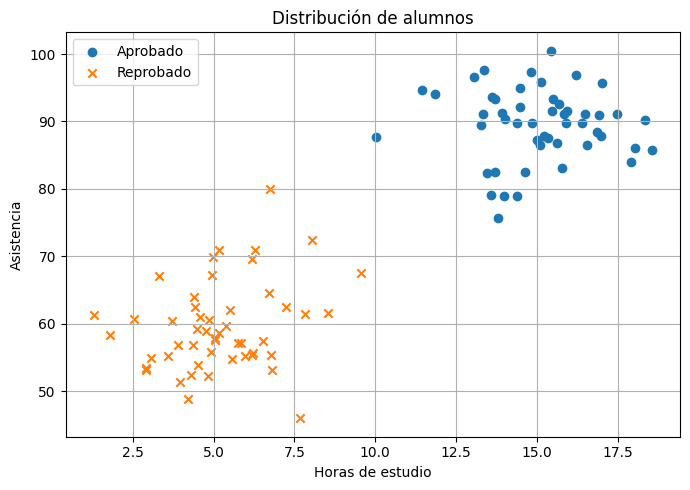

In [ ]:
plt.figure(figsize = (7, 5))
plt.scatter(aprob['Horas_estudio'], aprob['Asistencia'], label = 'Aprobado', marker = 'o')
plt.scatter(reprb['Horas_estudio'], reprb['Asistencia'], label = 'Reprobado', marker = 'x')
plt.xlabel('Horas de estudio')
plt.ylabel('Asistencia')
plt.title('Distribución de alumnos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En esta gráfica se pudo observar cuan separadas estás las clases de alumnos reprobados y no reprobados, haciendo más facil separar las clases

### Centroides

Se forman 3 centroides con las medias de las clases y la media de todos los datos

In [ ]:
centroide_ap = aprob[['Horas_estudio', 'Asistencia']].mean().values.reshape(2, 1)
centroide_rep = reprb[['Horas_estudio', 'Asistencia']].mean().values.reshape(2, 1)
centroide_global = df[['Horas_estudio', 'Asistencia']].mean().values.reshape(2, 1)

### La desviación estandar de los datos se usará como el radio del centroide

Se tomará la media de las desviaciones estandar como el radio que abarcarán los circulos

In [ ]:
std_ap = aprob[['Horas_estudio', 'Asistencia']].std().mean()
std_rep = reprb[['Horas_estudio', 'Asistencia']].std().mean()
std_global = df[['Horas_estudio', 'Asistencia']].std().mean()

### Distribución con centroides

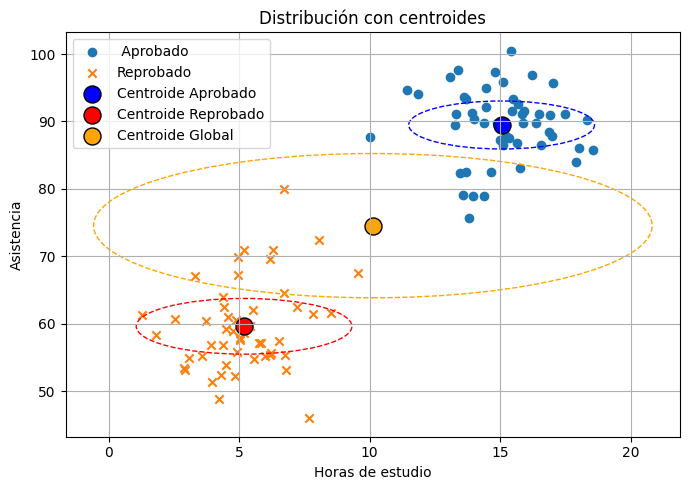

In [ ]:
plt.figure(figsize=(7, 5))

plt.scatter(aprob['Horas_estudio'], aprob['Asistencia'], label =' Aprobado' , marker = 'o')
plt.scatter(reprb['Horas_estudio'], reprb['Asistencia'], label = 'Reprobado', marker = 'x')

plt.scatter(centroide_ap[0], centroide_ap[1], color ='blue', s = 150, edgecolors = 'black',  label = 'Centroide Aprobado')
plt.scatter(centroide_rep[0], centroide_rep[1], color = 'red', s = 150, edgecolors = 'black', label = 'Centroide Reprobado')
plt.scatter(centroide_global[0], centroide_global [1], color = 'orange', s = 150, edgecolors = 'black', label = 'Centroide Global')

circle_ap = Circle((centroide_ap[0][0], centroide_ap[1][0]), radius = std_ap, fill = False, edgecolor = 'blue', linestyle = '--')
circle_rep = Circle((centroide_rep[0][0], centroide_rep[1][0]), radius = std_rep, fill = False, edgecolor = 'red', linestyle = '--')
circle_global = Circle((centroide_global[0][0], centroide_global[1][0]), radius = std_global, fill = False, edgecolor ='orange', linestyle = '--')

plt.gca().add_patch(circle_ap)
plt.gca().add_patch(circle_rep)
plt.gca().add_patch(circle_global)

plt.xlabel('Horas de estudio')
plt.ylabel('Asistencia')
plt.title('Distribución con centroides')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En la gráfica se muestrá como se distriyen los centroides con sus radios y se puede visualizar como se separan muy bien las clases

### Matrices de dispersión

In [ ]:
S_W = np.zeros((2, 2))

for x in aprob[['Horas_estudio', 'Asistencia']].values:
    x = x.reshape(2, 1)
    S_W += (x - centroide_ap) @ (x - centroide_ap).T

for x in reprb[['Horas_estudio', 'Asistencia']].values:
    x = x.reshape(2, 1)
    S_W += (x - centroide_rep) @ (x - centroide_rep).T

S_B = alumnos * (centroide_ap - centroide_global) @ (centroide_ap - centroide_global).T + \
      alumnos * (centroide_rep - centroide_global) @ (centroide_rep - centroide_global).T

Esta matriz mide la dispersión de los datos dentro de cada clase (Aprobado y Reprobado) SW

Esta matriz mide la dispersión entre las clases. Un valor S_B alto indica que las clases están bien separadas. SB

### Dirección de w

In [ ]:
w = inv(S_W) @ (centroide_ap - centroide_rep)
w_norm = w / np.linalg.norm(w)
print("Dirección LDA:", w)
print("Dirección LDA (normalizada):", w_norm)

Dirección LDA: [[0.03094299]
 [0.00736867]]
Dirección LDA (normalizada): [[0.97279709]
 [0.23165884]]


w =  Este vector representa la dirección en la que se proyectan los datos para maximizar la separación entre las clases.
w_norm = Este es el vector w normalizado a una longitud de 1. Se utiliza para proyectar los datos en un espacio unidimensional.

###Reducción de dimensionalidad

In [ ]:
X = df [['Horas_estudio', 'Asistencia']].values
df['Proyeccion_LDA'] = X @ w

### Histograma

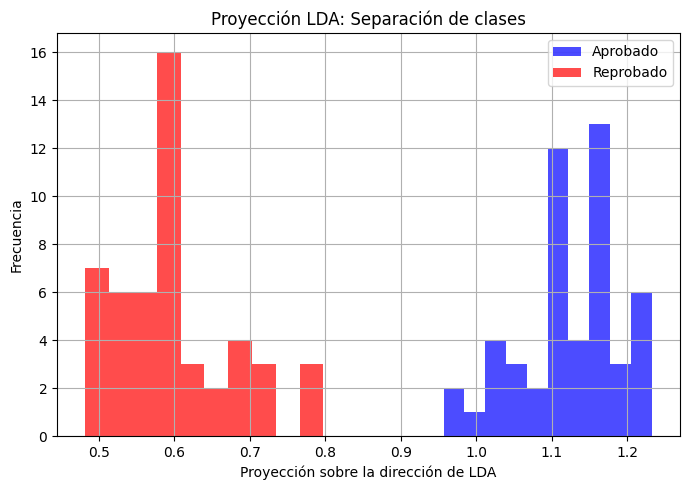

In [ ]:
plt.figure(figsize = (7, 5))
plt.hist(df[df['Clase'] == 'Aprobado']['Proyeccion_LDA'], bins = 10, alpha = 0.7, label = 'Aprobado', color = 'blue')
plt.hist(df[df['Clase'] == 'Reprobado']['Proyeccion_LDA'], bins = 10, alpha = 0.7, label = 'Reprobado', color = 'red')
plt.xlabel('Proyección sobre la dirección de LDA')
plt.ylabel('Frecuencia')
plt.title('Proyección LDA: Separación de clases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se visualizan los datos mediante un histograma, observando que efectivamente siguen una distribución normal como se estableció anteriormente

### Resultados

In [ ]:
print(df[['Alumno', 'Clase', 'Horas_estudio', 'Asistencia', 'Proyeccion_LDA']])

   Alumno      Clase  Horas_estudio  Asistencia  Proyeccion_LDA
0      A1   Aprobado      15.892665   89.786720        1.153375
1      A2   Aprobado      18.338240   90.232401        1.232332
2      A3   Aprobado      14.471440   95.004498        1.147846
3      A4   Aprobado      13.064330   96.605233        1.116101
4      A5   Aprobado      15.118377   95.855481        1.174135
..    ...        ...            ...         ...             ...
95    R46  Reprobado       4.377238   56.796341        0.553958
96    R47  Reprobado       4.835668   52.249031        0.534636
97    R48  Reprobado       1.292156   61.349126        0.492044
98    R49  Reprobado       4.570492   60.943172        0.590495
99    R50  Reprobado       5.515421   62.066495        0.628011

[100 rows x 5 columns]


 Esta columna en el DataFrame contiene la proyección de cada punto de datos en la dirección de w. Estos valores se utilizan para separar las clases.

### Proyección de los puntos sobre la dirección de w

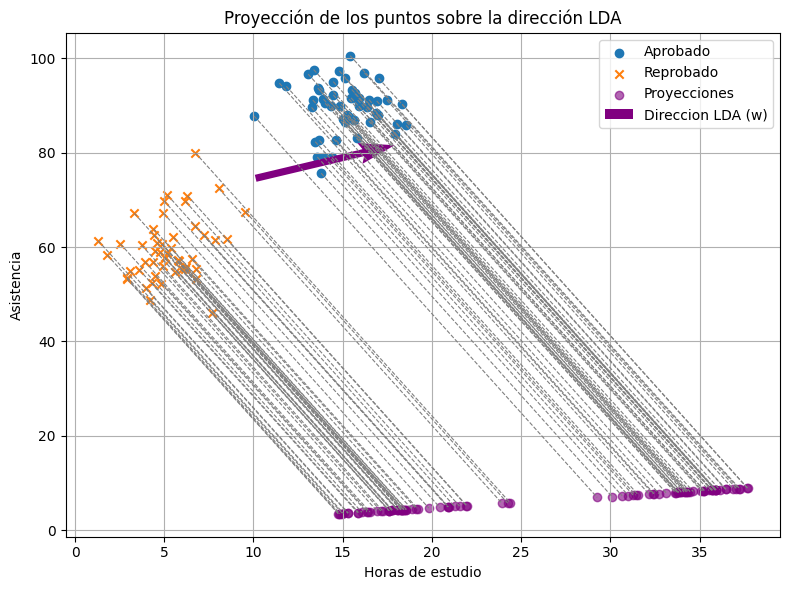

In [ ]:
X = df[['Horas_estudio', 'Asistencia']].values

proyecciones = X @ w_norm
puntos_proyectados = proyecciones @ w_norm.T

plt.figure(figsize=(8, 6))
plt.scatter(aprob['Horas_estudio'], aprob['Asistencia'], label = 'Aprobado', marker = 'o')
plt.scatter(reprb['Horas_estudio'], reprb['Asistencia'], label = 'Reprobado', marker = 'x')

for i in range (len(X)):
  original = X[i]
  proyectado = puntos_proyectados[i]
  plt.plot([original[0], proyectado[0]], [original[1], proyectado[1]], color = 'gray', linestyle = '--', linewidth = 0.8)

plt.scatter(puntos_proyectados[:, 0], puntos_proyectados[:, 1], color = 'purple', alpha = 0.6, label = 'Proyecciones')
plt.quiver(centroide_global[0], centroide_global[1], w_norm[0,0], w_norm [1, 0], color = 'purple', scale = 5, width = 0.01, label = 'Direccion LDA (w)')


plt.xlabel('Horas de estudio')
plt.ylabel('Asistencia')
plt.title('Proyección de los puntos sobre la dirección LDA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

La flecha morada representa la dirección de proyección
𝑤, que es la dirección óptima LDA para separar ambas clases y las líneas punteadas de color gris, indican cómo cada punto original se proyecta sobre esa dirección.


###Clasificación

Calcular el umbral como el promedio de los centros proyectados

In [ ]:
media_ap = df[df['Clase'] == 'Aprobado']['Proyeccion_LDA'].mean()
media_rep = df[df['Clase'] == 'Reprobado']['Proyeccion_LDA'].mean()
umbral = (media_ap + media_rep)/2
print(f'El umbral es: {umbral}')

El umbral es: 0.8624757040364297


###Predicciones

Corrobororamos el funcionamiento del modelo generando una tabla comparativa donde muestre la clase esperada y la clase optenida (predicha), su proyeccion LDA y un verificador del valor predicho

In [ ]:
df['Prediccion_LDA'] = df['Proyeccion_LDA'].apply(lambda x: 'Aprobado' if x>= umbral else 'Reprobado')
df['Resultado'] = df.apply(lambda row: 'Correcto' if row['Clase'] == row['Prediccion_LDA'] else 'Incorrecto', axis=1)
df['Correcto'] = df['Clase'] == df['Prediccion_LDA']
print(df[['Alumno', 'Clase', 'Proyeccion_LDA', 'Prediccion_LDA', 'Correcto']])

   Alumno      Clase  Proyeccion_LDA Prediccion_LDA  Correcto
0      A1   Aprobado        1.153375       Aprobado      True
1      A2   Aprobado        1.232332       Aprobado      True
2      A3   Aprobado        1.147846       Aprobado      True
3      A4   Aprobado        1.116101       Aprobado      True
4      A5   Aprobado        1.174135       Aprobado      True
..    ...        ...             ...            ...       ...
95    R46  Reprobado        0.553958      Reprobado      True
96    R47  Reprobado        0.534636      Reprobado      True
97    R48  Reprobado        0.492044      Reprobado      True
98    R49  Reprobado        0.590495      Reprobado      True
99    R50  Reprobado        0.628011      Reprobado      True

[100 rows x 5 columns]


### Nueva Predicción con input

In [ ]:
horas_estudio = float(input("Ingrese las horas de estudio del alumno: "))
asistencia = float(input("Ingrese la asistencia del alumno: "))

nuevo_alumno = pd.DataFrame({
    'Horas de estudio': [horas_estudio],
    'Asistencia': [asistencia]
})

nuevo_alumno['Proyeccion_LDA'] = nuevo_alumno[['Horas de estudio', 'Asistencia']].values @ w

proyeccion_nuevo_alumno = nuevo_alumno['Proyeccion_LDA'].iloc[0]
prediccion = 'Aprobado' if proyeccion_nuevo_alumno >= umbral else 'Reprobado'

print(f"Predicción para el nuevo alumno: {prediccion}")

Ingrese las horas de estudio del alumno: 100
Ingrese la asistencia del alumno: 10
Predicción para el nuevo alumno: Aprobado


##Código con el uso de librerías

###Librerias

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X = df[['Horas_estudio', 'Asistencia']].values
y = df['Clase'].values

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

In [ ]:
w_2 = lda.coef_[0]
w_norm_2 = w_2 / np.linalg.norm(w_2)
print("Dirección LDA:", w_2)
print("Dirección LDA:", w_norm_2)

Dirección LDA: [-3.03241288 -0.72212928]
Dirección LDA: [-0.97279709 -0.23165884]


In [ ]:
y_pred = lda.predict(X)
df['Prediccionsk'] = y_pred
df['Correctosk'] = df['Clase'] == df['Prediccionsk']
df['Resultadosk'] = df.apply(lambda row: 'Correcto' if row['Clase'] == row['Prediccionsk'] else 'Incorrecto', axis=1)
print(df[['Alumno', 'Clase', 'Prediccionsk', 'Correctosk']])



   Alumno      Clase Prediccionsk  Correctosk
0      A1   Aprobado     Aprobado        True
1      A2   Aprobado     Aprobado        True
2      A3   Aprobado     Aprobado        True
3      A4   Aprobado     Aprobado        True
4      A5   Aprobado     Aprobado        True
..    ...        ...          ...         ...
95    R46  Reprobado    Reprobado        True
96    R47  Reprobado    Reprobado        True
97    R48  Reprobado    Reprobado        True
98    R49  Reprobado    Reprobado        True
99    R50  Reprobado    Reprobado        True

[100 rows x 4 columns]


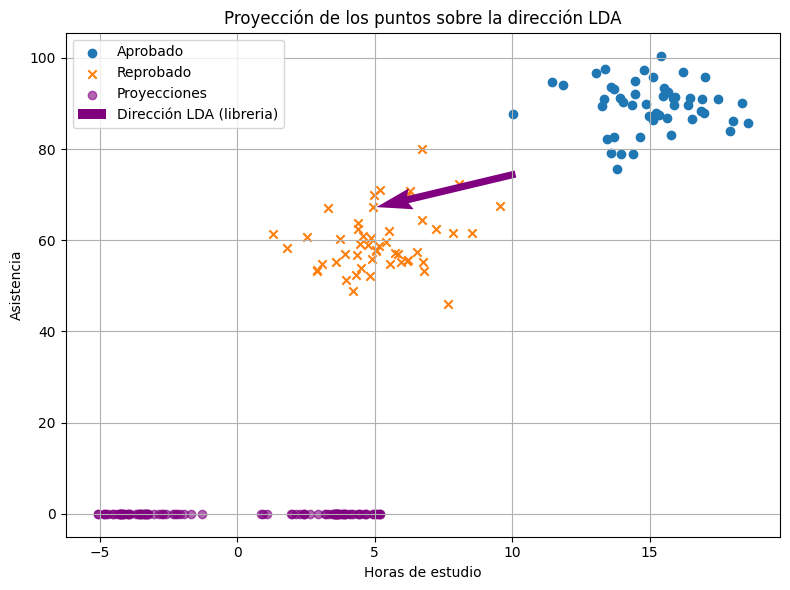

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(aprob['Horas_estudio'], aprob['Asistencia'], label='Aprobado', marker='o')
plt.scatter(reprb['Horas_estudio'], reprb['Asistencia'], label='Reprobado', marker='x')
plt.scatter(X_lda, np.zeros_like(X_lda), color='purple', alpha=0.6, label='Proyecciones')
plt.quiver(centroide_global[0], centroide_global[1], w_norm_2[0], w_norm_2[1], color='purple', scale=5, width=0.01, label='Dirección LDA (libreria)')

plt.xlabel('Horas de estudio')
plt.ylabel('Asistencia')
plt.title('Proyección de los puntos sobre la dirección LDA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###Predicción con nuevo input

In [ ]:
horas_estudio = float(input("Ingrese las horas de estudio del alumno: "))
asistencia = float(input("Ingrese la asistencia del alumno: "))

nuevo_alumno = pd.DataFrame({
    'Horas_estudio': [horas_estudio],
    'Asistencia': [asistencia]
})

prediccion = lda.predict(nuevo_alumno)[0]
print(f"Predicción para el nuevo alumno: {prediccion}")

Ingrese las horas de estudio del alumno: 24
Ingrese la asistencia del alumno: 5
Predicción para el nuevo alumno: Reprobado


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


**Conclusiones:**
*Se puede visualizar que la principal diferencia entre ambas implementaciones son los valores del vector w y los signos (se pueden ver en las gráficas), mientras el calculo de forma manual da valores positivos, el uso de la librería utiliza valores negativos, pero sin afectar el resultado final*